In [1]:
import warnings, scipy 
import pandas as pd
import numpy as np
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder
import datetime
#from datetime import time
from dateutil.parser import parse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('2018.csv', low_memory=False)


In [3]:
df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

## Data Cleaning

In [5]:
df1 = df.drop(['TAXI_OUT', 'WHEELS_OFF','WHEELS_ON','TAXI_IN','CANCELLATION_CODE'], axis=1)
#'AIR_TIME', 'ARR_TIME','CRS_DEP_TIME', 'DEP_TIME', 

In [6]:
list(df1.columns)

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'Unnamed: 27']

In [ ]:
#df1['WEATHER_DELAY'].unique()

In [ ]:
#df1['SECURITY_DELAY'].isnull().sum()

In [7]:
missing_df = df1.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,Unnamed: 27,7213446,0.000000
1,SECURITY_DELAY,5860736,18.752618
2,NAS_DELAY,5860736,18.752618
3,WEATHER_DELAY,5860736,18.752618
4,CARRIER_DELAY,5860736,18.752618
5,LATE_AIRCRAFT_DELAY,5860736,18.752618
6,ARR_DELAY,137040,98.100215
7,AIR_TIME,134442,98.136231
8,ACTUAL_ELAPSED_TIME,134442,98.136231
9,ARR_TIME,119245,98.346907


In [28]:
df2=df1

In [29]:
df2.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,1254,1230.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,1649,1636.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,1756,1754.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,922,936.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df2 = df2.iloc[: , :-1]
df2.head()


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,...,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,1254,1230.0,...,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,1649,1636.0,...,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,1756,1754.0,...,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,922,936.0,...,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN


In [31]:
df2.columns.str.match("Unnamed")
df2.loc[:,~df2.columns.str.match("Unnamed")]

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,...,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,1254,1230.0,...,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,1649,1636.0,...,0.0,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,1756,1754.0,...,0.0,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,922,936.0,...,0.0,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,1714,1709.0,...,0.0,100.0,99.0,72.0,331.0,NaN,NaN,NaN,NaN,NaN
7213442,2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,1952,1953.0,...,0.0,181.0,176.0,148.0,936.0,NaN,NaN,NaN,NaN,NaN
7213443,2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,2107,2118.0,...,0.0,112.0,128.0,88.0,511.0,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,1350,1404.0,...,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN


In [21]:
#df2 = df2[df2['SECURITY_DELAY'].notna()]

In [22]:
list(df2.columns)

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY']

In [32]:
df2 = df2.drop(['OP_CARRIER_FL_NUM','CANCELLED','DIVERTED', 'CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1)

In [36]:
dft = df2[df2.ARR_DELAY < 300]

<AxesSubplot:ylabel='Frequency'>

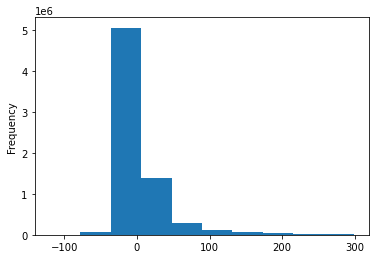

In [38]:
dft['ARR_DELAY'].plot.hist()

In [39]:
dft['ARR_DELAY'].value_counts()

-10.0     211863
-9.0      210788
-11.0     210305
-8.0      208090
-12.0     206309
           ...  
-91.0          1
-106.0         1
-112.0         1
-100.0         1
-98.0          1
Name: ARR_DELAY, Length: 401, dtype: int64

## EDA

In [15]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


<AxesSubplot:>

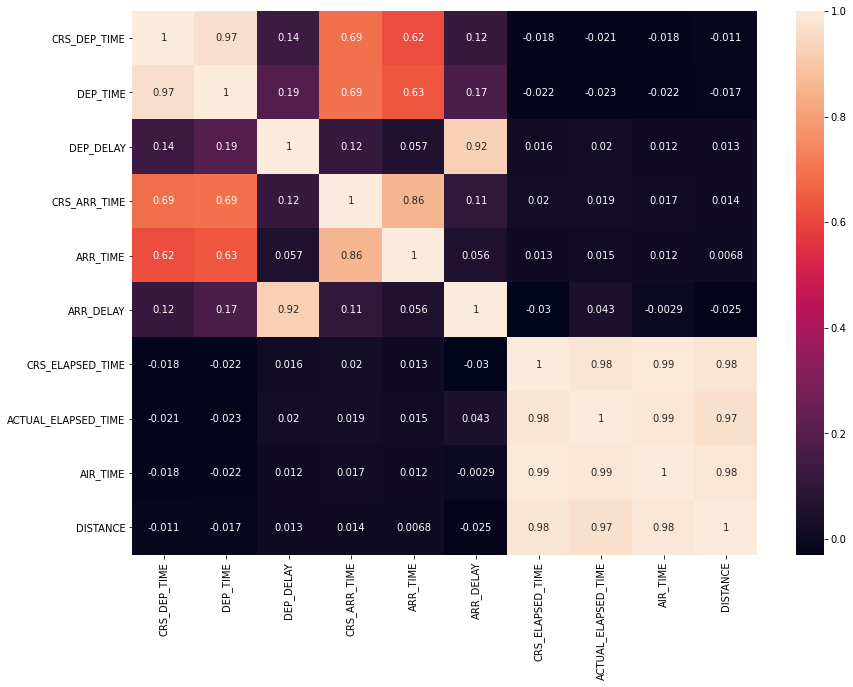

In [40]:
corr_matrix = dft.corr()
plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, annot = True)

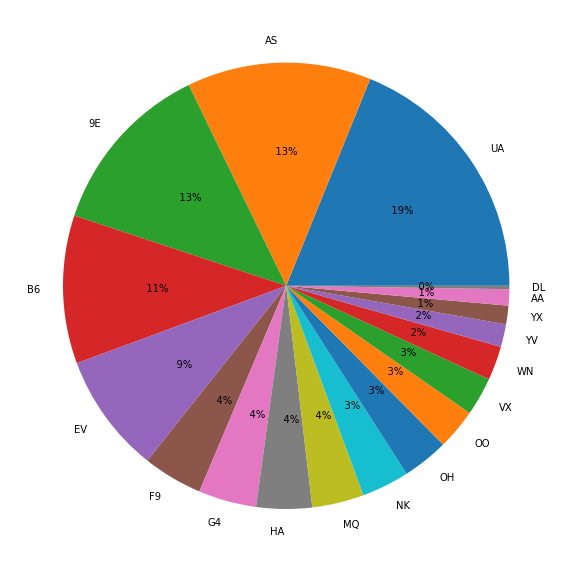

In [41]:
axis = plt.subplots(figsize=(10,14))
Name = dft["OP_CARRIER"].unique()
size = dft["OP_CARRIER"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()


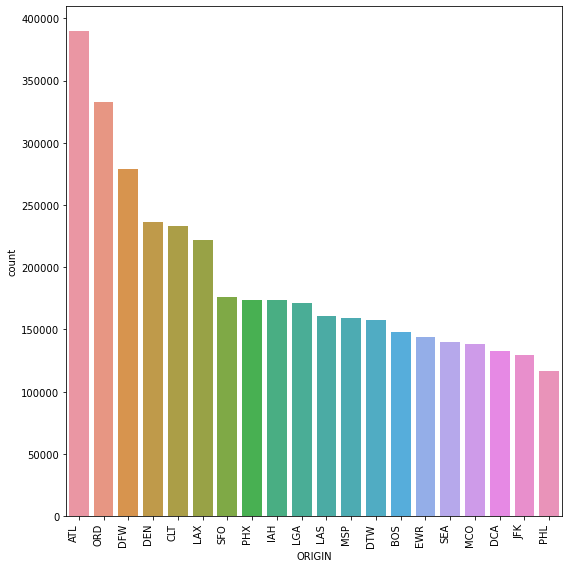

In [47]:
plt.figure(figsize=(8, 8))
axis = sns.countplot(x=df2['ORIGIN'], data = dft,
              order=df2['ORIGIN'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='OP_CARRIER', ylabel='ARR_DELAY'>

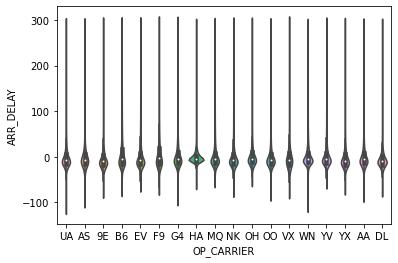

In [48]:
sns.violinplot(x='OP_CARRIER', y='ARR_DELAY', data=dft)


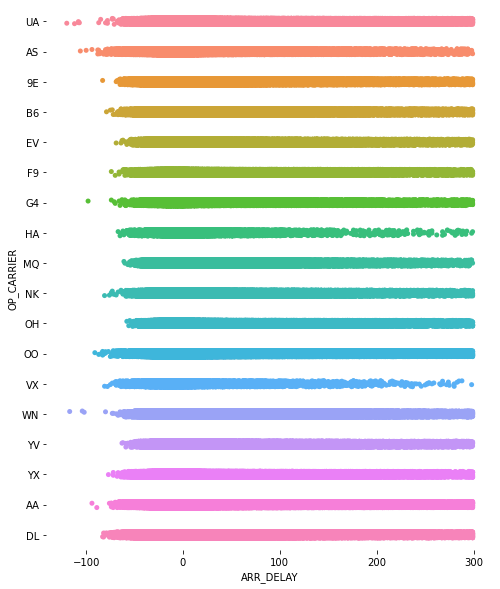

In [49]:
axis = plt.subplots(figsize=(8,10))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARR_DELAY", y="OP_CARRIER",
              data = dft, dodge=True, jitter=True
            )
plt.show()


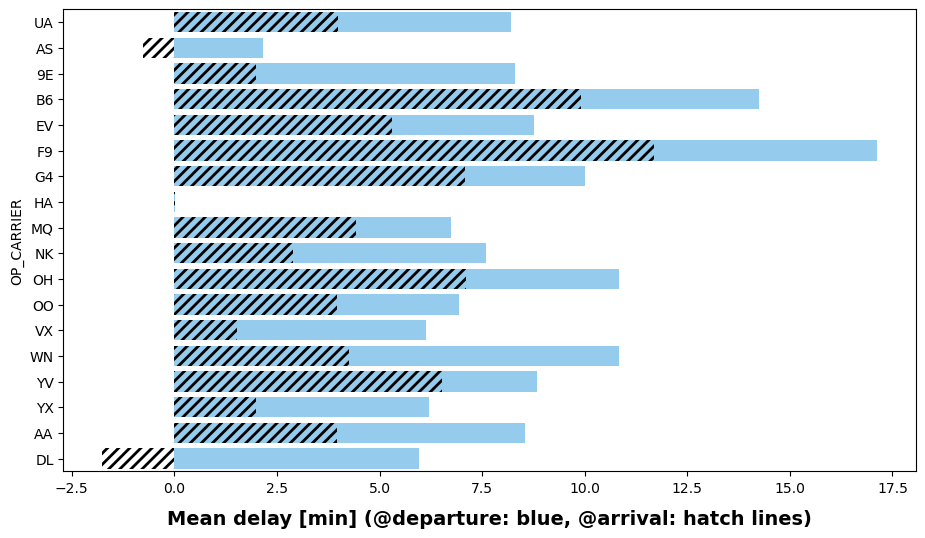

In [50]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 2.0  

fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEP_DELAY", y="OP_CARRIER", data=dft, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARR_DELAY", y="OP_CARRIER", data=dft, color="r", hatch = '///',
                 alpha = 0.0, ci=None)
#labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
#ax.set_yticklabels(labels)
#ax.yaxis.label.set_visible(False)
plt.xlabel('Mean delay [min] (@departure: blue, @arrival: hatch lines)',
           fontsize=14, weight = 'bold', labelpad=10);

## Encoding categorical columns

In [51]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dft['Airlines'] = encoder.fit_transform(dft['OP_CARRIER'])
dft['ORI'] = encoder.fit_transform(dft['ORIGIN'])
dft['DES'] = encoder.fit_transform(dft['DEST'])

<ipython-input-51-58365bdc9993>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Airlines'] = encoder.fit_transform(dft['OP_CARRIER'])
<ipython-input-51-58365bdc9993>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['ORI'] = encoder.fit_transform(dft['ORIGIN'])
<ipython-input-51-58365bdc9993>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [52]:
dft.head(3)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Airlines,ORI,DES
0,2018-01-01,UA,EWR,DEN,1517,1512.0,-5.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605.0,13,113,91
1,2018-01-01,UA,LAS,SFO,1115,1107.0,-8.0,1254,1230.0,-24.0,99.0,83.0,65.0,414.0,13,186,307
2,2018-01-01,UA,SNA,DEN,1335,1330.0,-5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846.0,13,320,91


In [53]:
dft = dft.drop(['OP_CARRIER','ORIGIN', 'DEST'], axis=1)


In [54]:
dft.isna().sum()

FL_DATE                   0
CRS_DEP_TIME              0
DEP_TIME                  0
DEP_DELAY              4588
CRS_ARR_TIME              0
ARR_TIME                  0
ARR_DELAY                 0
CRS_ELAPSED_TIME          0
ACTUAL_ELAPSED_TIME       1
AIR_TIME                  1
DISTANCE                  0
Airlines                  0
ORI                       0
DES                       0
dtype: int64

In [55]:
df3 = dft.dropna(subset = ['DEP_DELAY'])

In [56]:
import datetime
#from datetime import time
from dateutil.parser import parse

In [57]:
df3['DATE'] = pd.to_datetime(df2['FL_DATE'], infer_datetime_format=True)

<ipython-input-57-d355cbf7b1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['DATE'] = pd.to_datetime(df2['FL_DATE'], infer_datetime_format=True)


In [58]:
df3['DATE']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
7213441   2018-12-31
7213442   2018-12-31
7213443   2018-12-31
7213444   2018-12-31
7213445   2018-12-31
Name: DATE, Length: 7050586, dtype: datetime64[ns]

In [59]:
df3 = df3.drop(['FL_DATE'], axis=1)

In [ ]:
#df3 = df3.drop(['DATE'], axis=1)

In [ ]:
df3.info()

In [60]:
df3['day'] = df3.DATE.dt.day

In [61]:
df3['month'] = df3.DATE.dt.month

In [62]:
df3.head(3)

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Airlines,ORI,DES,DATE,day,month
0,1517,1512.0,-5.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605.0,13,113,91,2018-01-01,1,1
1,1115,1107.0,-8.0,1254,1230.0,-24.0,99.0,83.0,65.0,414.0,13,186,307,2018-01-01,1,1
2,1335,1330.0,-5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846.0,13,320,91,2018-01-01,1,1


## Models

 ## CLASSIFICATION MODEL: 1. add new column [delay: yes/no, dep_delay >15] 2. normalize delay type columns;
 

In [63]:
dfc= df3

In [64]:
dfc['delay'] = np.where(df3['ARR_DELAY']>= 15, 1, 0)
dfc.head(3)

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Airlines,ORI,DES,DATE,day,month,delay
0,1517,1512.0,-5.0,1745,1722.0,-23.0,268.0,250.0,225.0,1605.0,13,113,91,2018-01-01,1,1,0
1,1115,1107.0,-8.0,1254,1230.0,-24.0,99.0,83.0,65.0,414.0,13,186,307,2018-01-01,1,1,0
2,1335,1330.0,-5.0,1649,1636.0,-13.0,134.0,126.0,106.0,846.0,13,320,91,2018-01-01,1,1,0
3,1546,1552.0,6.0,1756,1754.0,-2.0,190.0,182.0,157.0,1120.0,13,293,247,2018-01-01,1,1,0
4,630,650.0,20.0,922,936.0,14.0,112.0,106.0,83.0,723.0,13,247,14,2018-01-01,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213441,1534,1530.0,-4.0,1714,1709.0,-5.0,100.0,99.0,72.0,331.0,1,90,71,2018-12-31,31,12,0
7213442,1751,1757.0,6.0,1952,1953.0,1.0,181.0,176.0,148.0,936.0,1,71,92,2018-12-31,31,12,0
7213443,2015,2010.0,-5.0,2107,2118.0,11.0,112.0,128.0,88.0,511.0,1,71,214,2018-12-31,31,12,0
7213444,1300,1323.0,23.0,1350,1404.0,14.0,50.0,41.0,26.0,130.0,1,71,283,2018-12-31,31,12,0


In [66]:
dfc['delay'].value_counts()

0    5719443
1    1331143
Name: delay, dtype: int64

<AxesSubplot:ylabel='Frequency'>

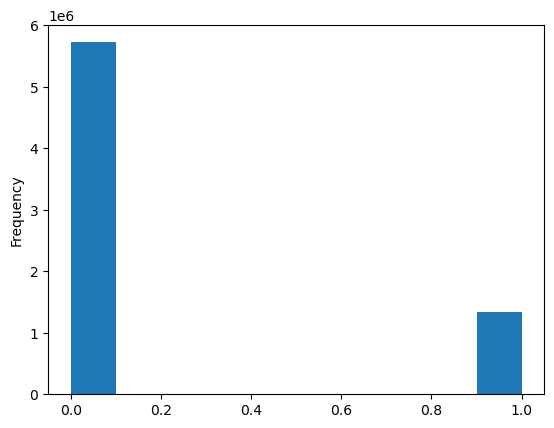

In [67]:
dfc['delay'].plot.hist()

### Imbalance is there, need to balance 

In [68]:
no_delay = len(dfc[dfc['delay'] == 1])

In [69]:
delay_indices = dfc[dfc.delay == 0].index

In [70]:
random_indices = np.random.choice(delay_indices,no_delay, replace=False)

In [71]:
no_delay_indices = dfc[dfc.delay == 1].index

In [72]:
under_sample_indices = np.concatenate([no_delay_indices,random_indices])

In [73]:
under_sample = dfc.loc[under_sample_indices]

In [74]:
under_sample

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,Airlines,ORI,DES,DATE,day,month,delay
11,2059,2300.0,121.0,2311,120.0,129.0,72.0,80.0,48.0,316.0,13,247,69,2018-01-01,1,1,1
14,2114,2230.0,76.0,15,128.0,73.0,121.0,118.0,99.0,763.0,13,247,53,2018-01-01,1,1,1
15,653,747.0,54.0,930,1025.0,55.0,337.0,338.0,302.0,2218.0,13,210,188,2018-01-01,1,1,1
16,1810,1922.0,72.0,2136,2201.0,25.0,386.0,339.0,319.0,2500.0,13,113,318,2018-01-01,1,1,1
17,1250,1337.0,47.0,1537,1606.0,29.0,167.0,149.0,131.0,1068.0,13,293,113,2018-01-01,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768058,2020,2033.0,13.0,2245,2239.0,-6.0,265.0,246.0,228.0,1733.0,15,212,305,2018-05-24,24,5,0
1639864,1343,1341.0,-2.0,1537,1526.0,-11.0,114.0,105.0,84.0,594.0,4,21,220,2018-03-28,28,3,0
4653026,1810,1802.0,-8.0,2137,2117.0,-20.0,387.0,375.0,340.0,2588.0,2,44,295,2018-08-23,23,8,0
465709,1910,1907.0,-3.0,2210,2153.0,-17.0,180.0,166.0,140.0,971.0,6,172,210,2018-01-26,26,1,0


In [75]:
under_sample['delay'].value_counts()

0    1331143
1    1331143
Name: delay, dtype: int64

<AxesSubplot:ylabel='Frequency'>

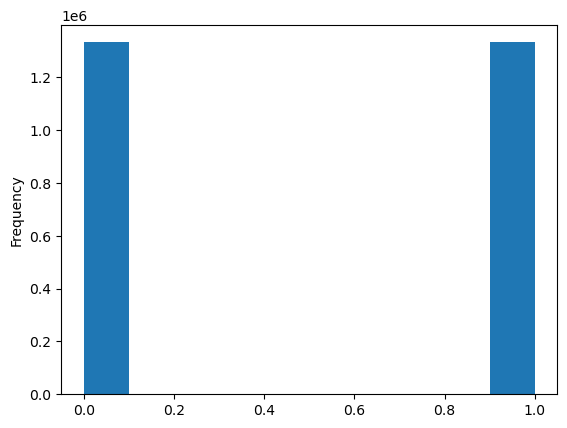

In [77]:
under_sample['delay'].plot.hist()

In [78]:
under_sample = under_sample.drop(columns=['DATE','CRS_ARR_TIME','AIR_TIME', 'ACTUAL_ELAPSED_TIME', 'ARR_TIME','CRS_DEP_TIME','DEP_TIME','CRS_ELAPSED_TIME', 'ARR_DELAY'])

In [79]:
under_sample 

,DEP_DELAY,DISTANCE,Airlines,ORI,DES,day,month,delay
11,121.0,316.0,13,247,69,1,1,1
14,76.0,763.0,13,247,53,1,1,1
15,54.0,2218.0,13,210,188,1,1,1
16,72.0,2500.0,13,113,318,1,1,1
17,47.0,1068.0,13,293,113,1,1,1
...,...,...,...,...,...,...,...,...
2768058,13.0,1733.0,15,212,305,24,5,0
1639864,-2.0,594.0,4,21,220,28,3,0
4653026,-8.0,2588.0,2,44,295,23,8,0
465709,-3.0,971.0,6,172,210,26,1,0


In [ ]:
#under_sample['Est_AVG_Speed'] = under_sample['DISTANCE'] / under_sample['CRS_ELAPSED_TIME']

In [80]:
under_sample.isna().sum()

DEP_DELAY    0
DISTANCE     0
Airlines     0
ORI          0
DES          0
day          0
month        0
delay        0
dtype: int64

## Logistic Regression

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_under = under_sample.loc[:,under_sample.columns != 'delay']
y_under = under_sample.loc[:,under_sample.columns == 'delay']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.2, random_state = 0)

lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
from sklearn.metrics import recall_score, accuracy_score

In [83]:
print(recall_score(y_under_test,y_under_pred))
print(accuracy_score(y_under_test,y_under_pred))

0.8065139273362891
0.8649320697594928


## Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_under_train, y_under_train)
rf_predictions = rf_model.predict(X_under_test)
print(accuracy_score(y_under_test, rf_predictions)*100)

<ipython-input-84-1f0f2de289ed>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf.fit(X_under_train, y_under_train)


86.53715410417348


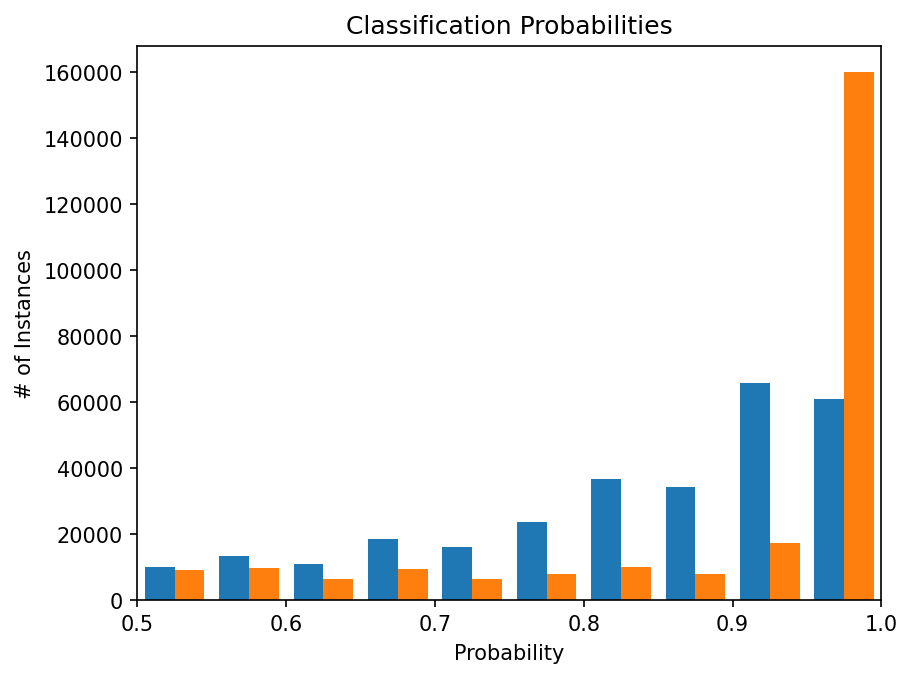

In [86]:
# get the probability distribution
probas = rf_model.predict_proba(X_under_test)
# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.show()

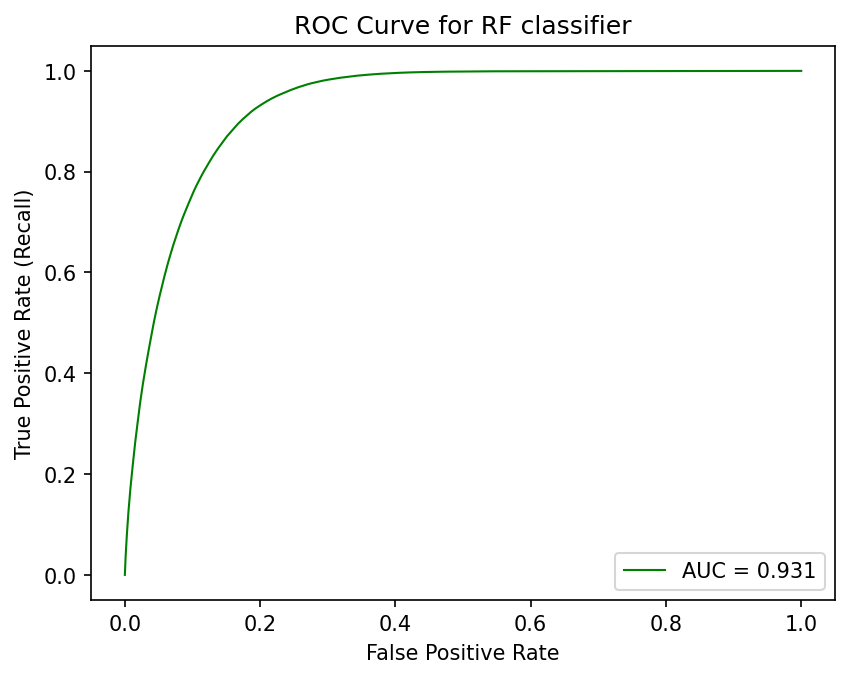

In [87]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_under_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

## KNN Classifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_under_train, y_under_train)

#Predict the response for test dataset
y_pred = knn.predict(X_under_test)
print(accuracy_score(y_under_test, y_pred)*100)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


85.3749967133558


## Calculating VIF

In [99]:
df3 = df3.drop(['delay','DATE'], axis=1)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
df3.isna().sum()

CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
Airlines               0
ORI                    0
DES                    0
day                    0
month                  0
dtype: int64

In [93]:
df3 = df3.dropna(subset = ['ACTUAL_ELAPSED_TIME','AIR_TIME'])

In [101]:
X = df3.drop('ARR_DELAY',axis = 1)
y = df3['ARR_DELAY']

In [102]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature         VIF
0          CRS_DEP_TIME  128.983363
1              DEP_TIME  130.140745
2             DEP_DELAY    1.170647
3          CRS_ARR_TIME   41.250635
4              ARR_TIME   32.934212
5      CRS_ELAPSED_TIME  223.528086
6   ACTUAL_ELAPSED_TIME  197.737609
7              AIR_TIME  300.293247
8              DISTANCE  100.250603
9              Airlines    3.252940
10                  ORI    4.011330
11                  DES    4.178512
12                  day    3.939783
13                month    4.288984


In [104]:
df3 = df3.drop(columns=['CRS_DEP_TIME','DEP_TIME', 'CRS_ARR_TIME','ARR_TIME','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME','DISTANCE'])


In [116]:
df3 = df3.drop(columns=['day','month'])

In [105]:
df3.head()

,DEP_DELAY,ARR_DELAY,Airlines,ORI,DES,day,month
0,-5.0,-23.0,13,113,91,1,1
1,-8.0,-24.0,13,186,307,1,1
2,-5.0,-13.0,13,320,91,1,1
3,6.0,-2.0,13,293,247,1,1
4,20.0,14.0,13,247,14,1,1


## Regression Models

In [106]:
# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [117]:
X = df3.drop('ARR_DELAY',axis = 1)
y = df3['ARR_DELAY']


In [118]:
# Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [119]:
sc=StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Linear Regression

In [120]:
lr = LinearRegression()

In [121]:
lr_model = lr.fit(X_train_scaled, y_train)

In [122]:
y_pred = lr_model.predict(X_test_scaled)

In [123]:
# to calculate adjusted r2  
adjr = 1 - (1-lr.score(X_train_scaled, y_train))*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

In [124]:
#The value for R-squared can range from 0 to 1. 
#A value of 0 indicates that the response variable cannot be explained by the predictor variable at all 
#while a value of 1 indicates that the response variable can be perfectly explained without error by the predictor variables.

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 : ',r2_score(y_test, y_pred))
print('Adjusted R2: ', adjr)

Mean Absolute Error: 9.448988867879928
Mean Squared Error: 181.84205444798553
Root Mean Squared Error: 13.484882441014662
R2 :  0.8547668460365744
Adjusted R2:  0.8553869870384765


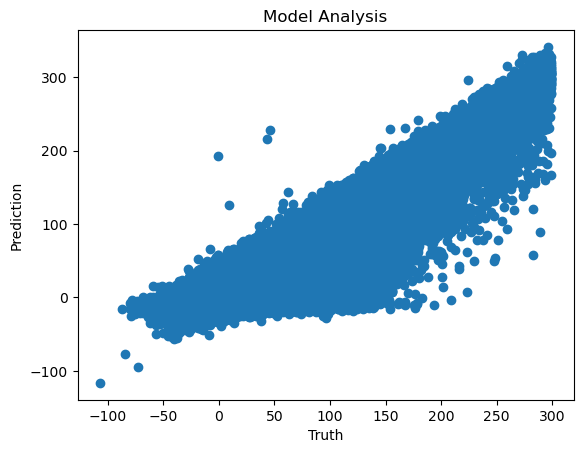

In [125]:
plt.scatter(y_test, y_pred)
plt.title("Model Analysis")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

## Random Forest Regressor

In [ ]:
Rfc = RandomForestRegressor(random_state=2)
rfc_model = Rfc.fit(X_train_scaled, y_train)
rfc_y_pred = rfc_model.predict(X_test_scaled)

In [ ]:
# to calculate adjusted r2  
adjrfc = 1 - (1-Rfc.score(X_train_scaled, y_train))*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, rfc_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, rfc_y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, rfc_y_pred)))
print('R2 : ',r2_score(y_test, rfc_y_pred))
print('Adjusted R2: ', adjrfc)

In [ ]:
plt.scatter(y_test, rfc_y_pred)
plt.title("Model Analysis")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

## Ridge

In [ ]:
ridge = Ridge()
ridge_model = ridge.fit(X_train_scaled, y_train)
ridge_y_pred = ridge_model.predict(X_test_scaled)

In [ ]:
# to calculate adjusted r2  
adj_ridge = 1 - (1-ridge.score(X_train_scaled, y_train))*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, ridge_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, ridge_y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ridge_y_pred)))
print('R2 : ',r2_score(y_test, ridge_y_pred))
print('Adjusted R2: ', adj_ridge)

In [ ]:
plt.scatter(y_test, ridge_y_pred)
plt.title("Model Analysis")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

## Lasso

In [ ]:
ls = Lasso()
ls_model = ls.fit(X_train_scaled, y_train)
ls_pred = ls_model.predict(X_test_scaled)

In [ ]:
# to calculate adjusted r2  
adj_ls = 1 - (1-ls.score(X_train_scaled, y_train))*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test, ls_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, ls_pred)))
print('R2 : ',r2_score(y_test, ls_pred))
print('Adjusted R2: ', adj_ls)

In [ ]:
plt.scatter(y_test, ls_pred)
plt.title("Model Analysis")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()

## Decision Tree

In [ ]:
dt = DecisionTreeRegressor(random_state = 2)
dt_model = dt.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [ ]:
# to calculate adjusted r2  
adj_dt = 1 - (1-dt.score(X_train_scaled, y_train))*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test, dt_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, dt_pred)))
print('R2 : ',r2_score(y_test, dt_pred))
print('Adjusted R2: ', adj_dt)

In [ ]:
plt.scatter(y_test, dt_pred)
plt.title("Model Analysis")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.show()